# Applied Data Visualization Lecture 5: Matplotlib

Matplotlib is a visualization library that is inspired by teh Matlab plotting library. It's powerful and widely used, and there's basially no way around it in Python. So let's dig in.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

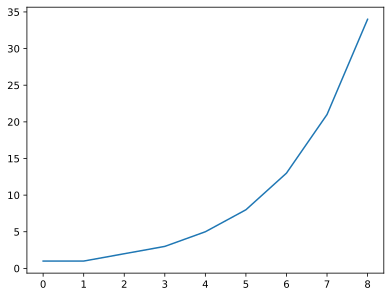

In [2]:
# an example data vector
fib_series = [1,1,2,3,5,8,13,21,34]

# here we run a simple plot command to create a line chart
plt.plot(fib_series)

The `.plot` command uses a [`figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) to plot in. If no figure has been defined, it will automatically create one. If there is already a figure, it will plot to the latest figure. 

Here we create a figure manually: 

In [3]:
# we create a figure with size 10 by 10 inches
fig = plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

The figure by itself doesn't plot anyhing. We have to add a [`subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) to it. A subplot is in pracice also an [`Axes`](https://matplotlib.org/stable/api/axes_api.html). An axes is where you control everything about a specific plot. Note the difference to [`axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) which are the actual axis with ticks and legends and so on. 

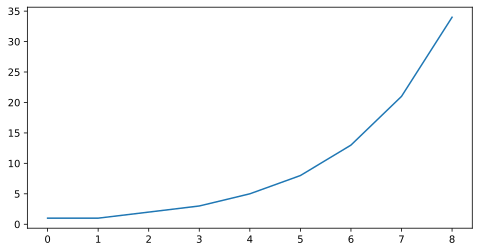

In [4]:
# figsize defines the size of the plot in inches - 8 wide by 4 high here. 
fig = plt.figure(figsize=(8, 4))
# add a suplot to a grid of 1x1, return the 1st figure
my_plot = fig.add_subplot(1,1,1)
# plotting a data array
my_plot.plot(fib_series)

Here we add a title and axis labels: 

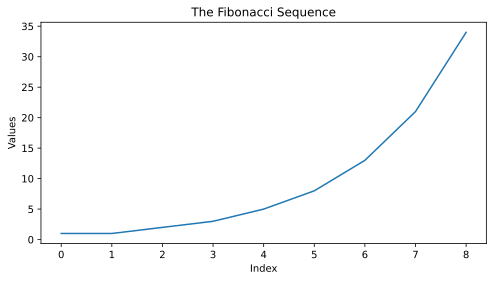

In [5]:
fig = plt.figure(figsize=(8, 4))
my_plot = fig.add_subplot(1,1,1)
my_plot.set_title('The Fibonacci Sequence')
my_plot.set_xlabel("Index")
my_plot.set_ylabel("Values")
my_plot.plot(fib_series)

## Explicit and Implicit Styles

Matplotlib allows you to create figures using either *explicit* or *implicit* style. You kind-of have to know both, because exiting code and example uses either. So what are the differences? 

In **implicit** style, we use `pyplot` to create figures and axes: 

Text(0.5, 1.0, 'The Fibonacci Sequence')

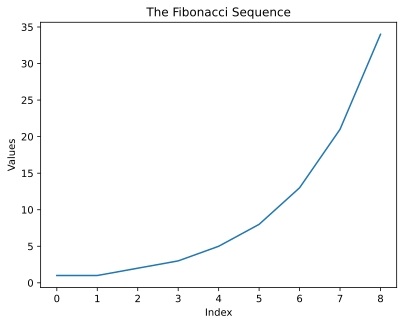

In [6]:
plt.plot(fib_series)
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("The Fibonacci Sequence")

Compare this to the **explicit** style we used previously, where we created a subplot / axes explicitly and then called on them: 

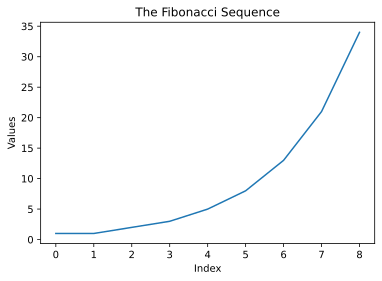

In [7]:
fig = plt.figure(figsize=(6, 4))
my_plot = fig.add_subplot(1,1,1)
my_plot.set_title('The Fibonacci Sequence')
my_plot.set_xlabel("Index")
my_plot.set_ylabel("Values")
my_plot.plot(fib_series)

So, which one should you use? Well, it depends on what you want to do. If you are just doing some quick data exploration, the pyplot interface is probably the easiest to use. If you are creating a complex visualization, the explicit / object-oriented interface is probably the better choice. We'll be using the explicit / object-oriented interface mostly, which is super-useful when creating multiple subplots. 

## Multi-Panel Figures 
Now let's create a figure with multiple subplots:

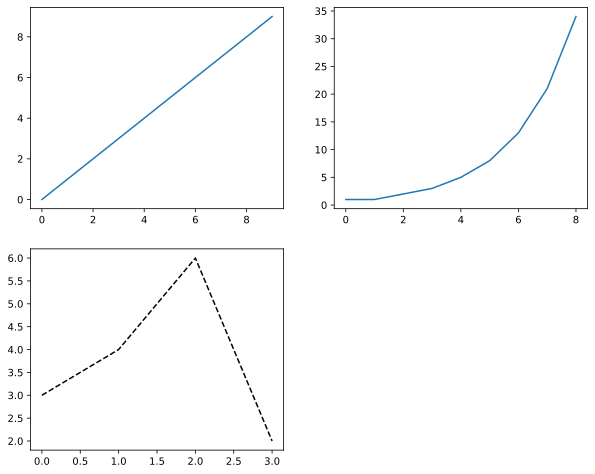

In [8]:
fig = plt.figure(figsize=(10, 8))
# create a subplot in a 2 by 2 grid, 
# return the subplot at position specified in third parameter
# these subplots are often called "axes"
# this is where explicit / oo mode realy pays off, because this would be impossible in pyplot mode
sub_fig_1 = fig.add_subplot(2,2,1)
sub_fig_2 = fig.add_subplot(2,2,2)
sub_fig_3 = fig.add_subplot(2,2,3)

# this will plot to the last figure used
# you shouldn't do that but rather use explicit subplot references if you have them
# k-- is a style option for a black dashed line
plt.plot([3, 4, 6, 2], "k--")

# here is how we can plot explicitly to a subfigure
sub_fig_1.plot(range(0,10))

sub_fig_2.plot(fib_series)

We can use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots) shorthand to create multiple subplots that we can access form an array. 



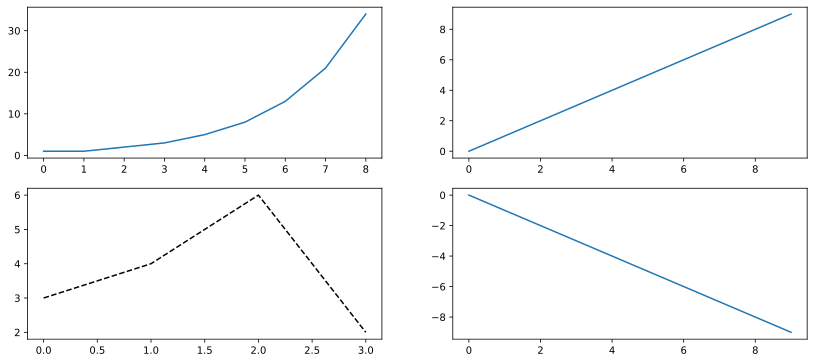

In [9]:
fig, subfigs = plt.subplots(2, 2, figsize=(14, 6))

subfigs[0][0].plot(fib_series)
subfigs[0][1].plot(range(10))
subfigs[1][0].plot([3, 4, 6, 2], "k--")
subfigs[1][1].plot(range(0,-10,-1))

## Styling Plots "Artists" 

You've already seen that we can use dashed lines, but there are many options to style your plot.  We can also plot multiple lines in the same axes. 

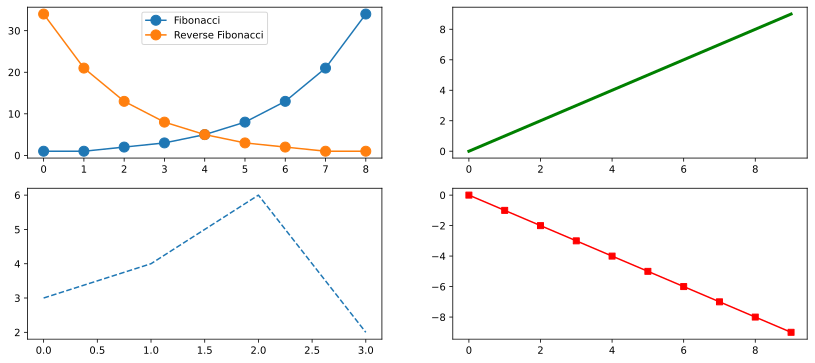

In [10]:
fig, subfigs = plt.subplots(2, 2, figsize=(14, 6))

# show the markers on the line
subfigs[0][0].plot(fib_series, marker="o", markersize=10, label="Fibonacci")
subfigs[0][0].plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")
# add a legend
subfigs[0][0].legend()
# change the color of the line to green and linewidth to 3
subfigs[0][1].plot(range(10), color="green", linewidth=3)
# change the linestyle to dashed
subfigs[1][0].plot([3, 4, 6, 2], linestyle="dashed")
# change the marker to a square and the color to red
subfigs[1][1].plot(range(0,-10,-1), marker="s", color="red")

There are also shortcut [format strings](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot:~:text=called%20bubble%20chart).-,Notes,-Format%20Strings) that might be good to at least know about. 

They work like this: ```fmt = '[marker][line][color]'```

For example, a marker could be a square `s`, a line can be dotted `:` and the color can be green `g`, so that would be the format string `s:g`

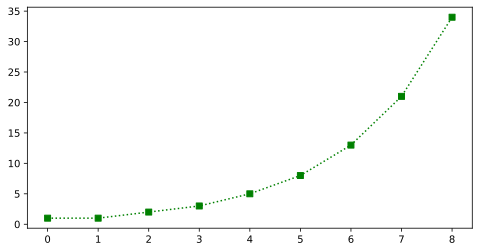

In [11]:
fig, subplot = plt.subplots(1, 1, figsize=(8, 4))
subplot.plot(fib_series, "s:g")

## Sidebar: ChatGPT and Co-Pilot

Note that this is really where ChatGPT and Co-Pilot shine. For minor stuff, I often write a comment line, and co-pilot fills it in: 

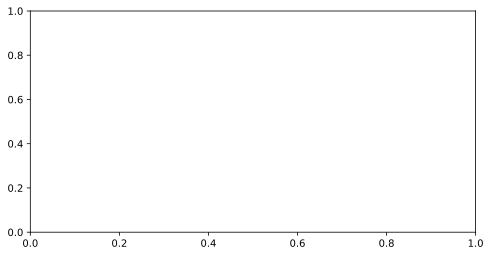

In [12]:
fig, subplot = plt.subplots(1, 1, figsize=(8, 4))
# a line chart based on the fib series with red circles as markers and an orange dashed line


Note that this didn't work for this case :) - but at least you have an idea what to start form. 

We can do more complex things with chatgpt. Here's a prompt: 

```
Create a matplotlib line chart with two lines. The first line should represent the first 10 fibonnachi numbers. The second, should be the same list but reversed. 
```

This is what chatgpt generated. Note that it had a bit of context from my history, and that yours might look quite different. 

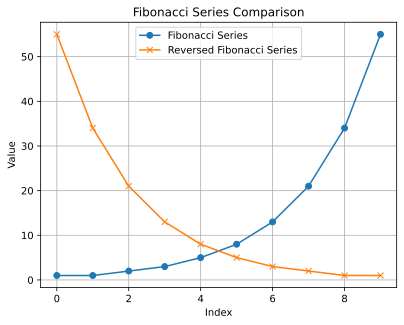

In [13]:
import matplotlib.pyplot as plt

fib_series = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
reversed_fib_series = fib_series[::-1]  # Reversed Fibonacci series

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the first Fibonacci series
ax.plot(fib_series, label='Fibonacci Series', marker='o')

# Plot the reversed Fibonacci series
ax.plot(reversed_fib_series, label='Reversed Fibonacci Series', marker='x')

# Set title and labels
ax.set_title('Fibonacci Series Comparison')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Add legend
ax.legend()

# Add grid lines
ax.grid(True)

# Display the chart
plt.show()


You can then ask it to revise the plot. Here's my prompt: 

```now plot the two series in separate charts below each other```

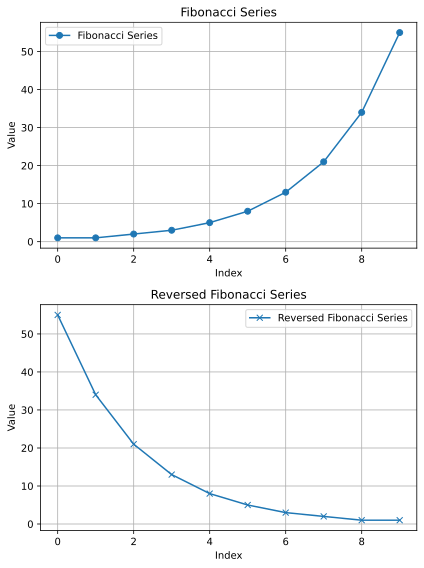

In [14]:
import matplotlib.pyplot as plt

fib_series = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
reversed_fib_series = fib_series[::-1]  # Reversed Fibonacci series

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Plot the first Fibonacci series in the first subplot
ax1.plot(fib_series, label='Fibonacci Series', marker='o')
ax1.set_title('Fibonacci Series')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True)

# Plot the reversed Fibonacci series in the second subplot
ax2.plot(reversed_fib_series, label='Reversed Fibonacci Series', marker='x')
ax2.set_title('Reversed Fibonacci Series')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Display the charts
plt.show()


## Different Plot Types

Next, we're also trying out a couple of different visualziation techniques: 

Visualizations for Correlations
 
 * [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  
 
Visualizations for raw data, one dimension 
 * [Vertical Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
 * [Horizontal Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)
 * [Pie Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)
 
Visualizations for distributions 
 * [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 * [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)
 * [Violin Plot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.violinplot.html)

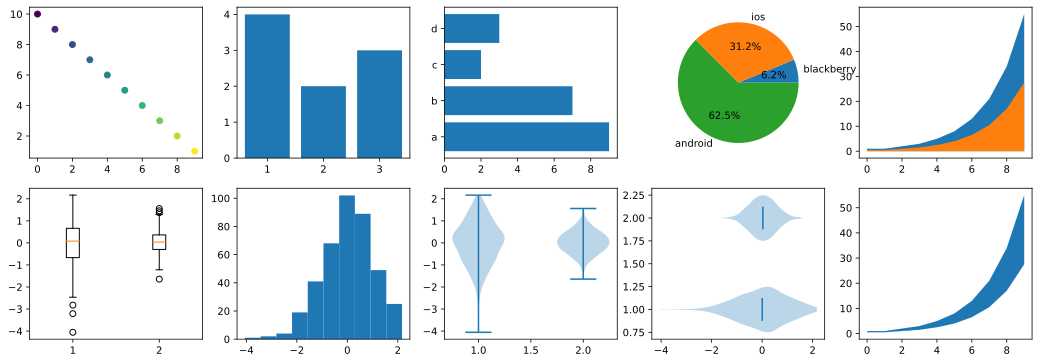

In [15]:
# generating random data drawing from a normal distribution 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html 
large_dist = np.random.randn(400)
small_dist = np.random.randn(400)*0.5


# a function because we'll reuse these later
def sample_figures():
    # define a figure with subfigures in 2 rows and 5 columns
    fig, subfigs = plt.subplots(2, 5, figsize=(18, 6))

    # Scatterplot. Pass two arrays for your x and y values. 
    # Pass the c values for the dimension you want to map to color
    # Pick a colormap with cmap
    subfigs[0,0].scatter(range(0,10),range(10,0,-1), c=range(0,10), cmap="viridis")
    
    # Bar Chart. First array is x position, second is value (height) of data
    subfigs[0,1].bar([1, 2, 3], [4, 2, 3])
    
    # Horizontal bar chart. 
    # First array contains y positions (expressed as range), second contains data values (lengths of bars), 
    # tick_label is an array of labels
    subfigs[0,2].barh(range(0,4), [9, 7, 2, 3], tick_label=["a", "b", "c", "d"])
    
    # You can also (but maybe you shouldn't) do pie charts. First array is shares of total. 
    # labels in the same order of data. autopct defines how to format the numerical labels 
    # (here, one digit after comma)
    subfigs[0,3].pie([1, 5, 10], labels=["blackberry", "ios", "android"], autopct='%1.1f%%')
    
    # Box plots visualizing two distributions with 100 items each. 
    subfigs[1,0].boxplot([large_dist, small_dist])
    
    # A histogram visualizes a distribution. It takes one array, we can specify bins as second parameter 'bins'
    subfigs[1,1].hist(large_dist)
    
    # A violing plot also visualizes a distribution, using kernel density estimation.  
    subfigs[1,2].violinplot([large_dist, small_dist])
    
    # A violin plot with means and without extrema
    subfigs[1,3].violinplot([large_dist, small_dist], showmeans=True,
        showextrema=False, vert=False)

    slow_rising = [x/2 for x in fib_series]
    # an area chart with two areas 
    # the first argument are the positions along the x axis, the second argument are the y values.
    subfigs[0,4].fill_between(range(0,len(fib_series)),fib_series)
    subfigs[0,4].fill_between(range(0,len(slow_rising)),slow_rising)

    # we can also specify a third parameter for a set of values
    subfigs[1,4].fill_between(range(0,len(fib_series)),fib_series, slow_rising)
 

sample_figures()

### Styling

Matplotlib has [different styles](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html) that we can apply globally.

Here are a couple of examples:

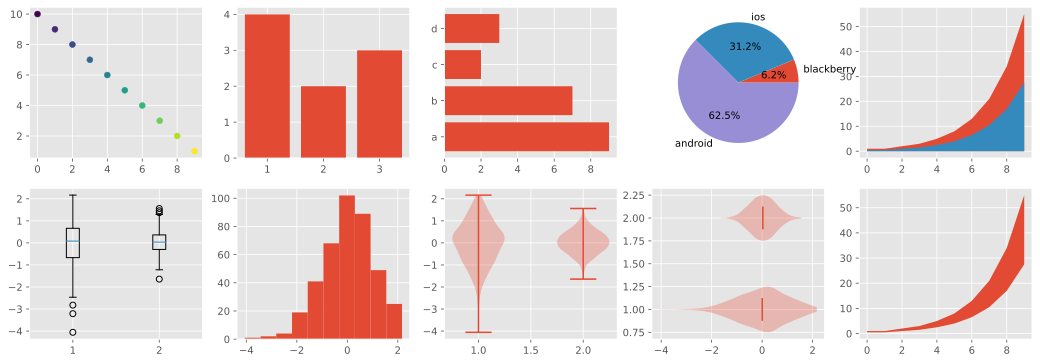

In [16]:
# ggplot style based on the popular R plotting library 
# we will be using this as a default in many lectures
plt.style.use('ggplot')
sample_figures()

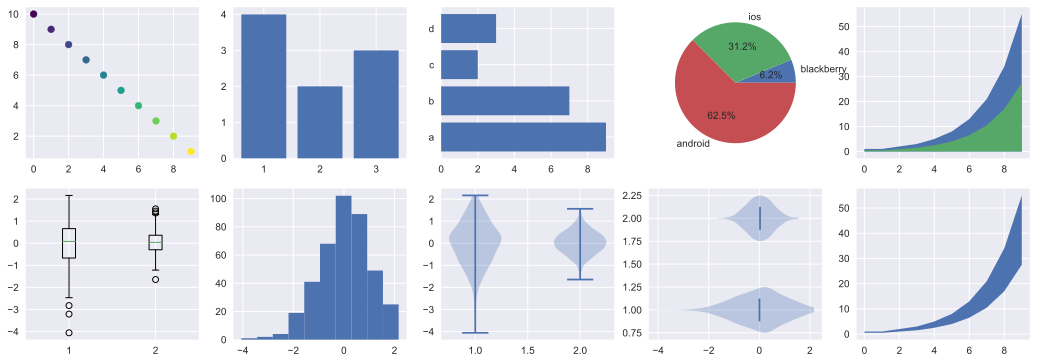

In [17]:
# style based on the seaborn library
plt.style.use('seaborn-v0_8')
sample_figures()

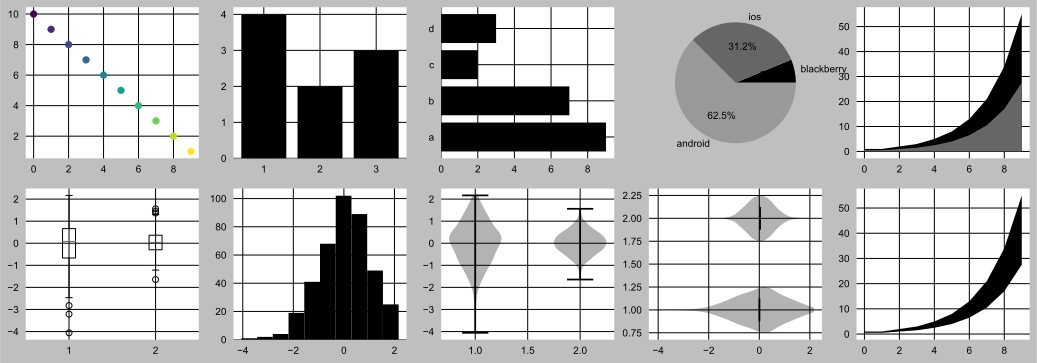

In [18]:
plt.style.use('grayscale')
sample_figures()

In [19]:
plt.style.use('default')

### Styling Components

We can also modify individual components of a figure. For that, it's useful to get an [overview of these components](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure): 

<img src="matplotlib_components.png" alt="Explaining different matplotlib components" style="width: 600px;"/>


We'll use these functions and others to style and annotate an example below: 

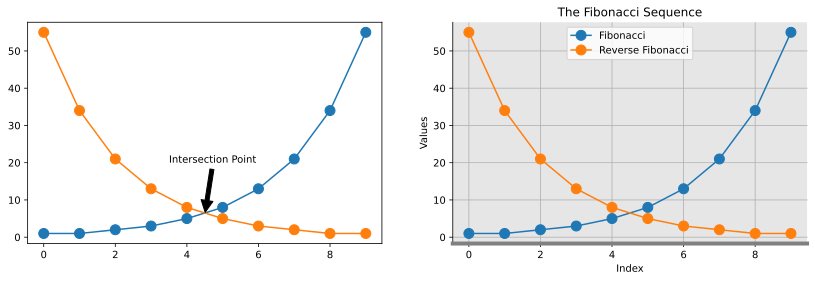

In [20]:
fig, subfigs = plt.subplots(1, 2, figsize=(14, 4))

subfigs[0].plot(fib_series, marker="o", markersize=10, label="Fibonacci")
subfigs[0].plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")

# Annotate the point xy with text text. In the simplest form, the text is placed at xy.
subfigs[0].annotate('Intersection Point', xy=(4.5, 6), xytext=(3.5, 20),
            arrowprops=dict(facecolor='black', shrink=0.05))

# We'll customize styling for the second plot
sub_2 = subfigs[1]
sub_2.plot(fib_series, marker="o", markersize=10, label="Fibonacci")
sub_2.plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")

# Titles and labels 
sub_2.set_title('The Fibonacci Sequence')   
sub_2.set_xlabel("Index")
sub_2.set_ylabel("Values")

# The legend
sub_2.legend()

# The grid lines
sub_2.grid(True)

# Turning off the top and right axis
sub_2.spines['top'].set_visible(False)
sub_2.spines['right'].set_visible(False)

# Changing the bottom axis
sub_2.spines['bottom'].set_color('gray')
# Increase width of bottom spine
sub_2.spines['bottom'].set_linewidth(4)

# Changinbg the background color of the plot area
sub_2.set_facecolor((0.9,0.9,0.9))

### Heat Maps

Heat maps encoded matrix/tabular data using color. There are two ways to implement heatmaps in Matplotlib:

 * [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

imshow is used to display images (which are just matrices, where the pixels have a colorvalue). In practice, imshow and pcolor differ mainly in their coordinate system: the origin of imshow is at the top left (as is common for images), the origin of pcolor is at the bottom left.

For heatmaps, we need a [color map](https://matplotlib.org/tutorials/colors/colormaps.html). Matplotlib has many color maps baked in, also those from http://colorbrewer.org.

Note that heat maps for general numerical data isn't something that's fun to do in Matplotlib; we'll use other libraries for that. But it's fine for field data. 

In [21]:
# a helper function to create some 2D data based on a gaussian kernel.
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))
    return kernel / np.sum(kernel)

kernel = gkern(20, 5)

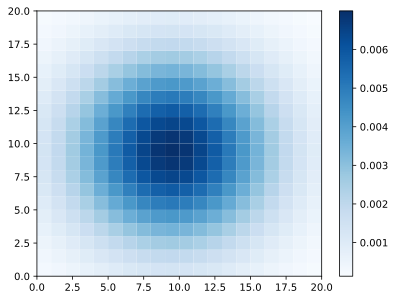

In [22]:
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(kernel, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

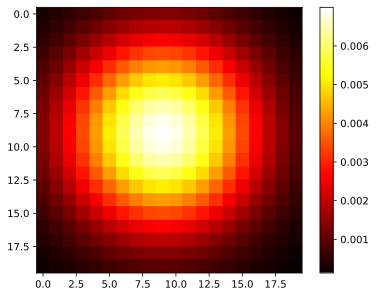

In [23]:
hm = plt.imshow(kernel, cmap='hot')
plt.colorbar(hm)

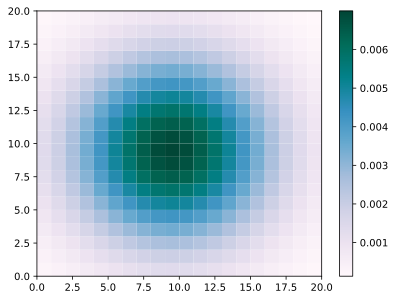

In [24]:
# a diverging color map from Color Brewer
heatmap = plt.pcolor(kernel, cmap=plt.cm.PuBuGn)
plt.colorbar(heatmap)

That's it for today; we'll explore more plotting soon!